In [1]:
import numpy as np
# from helpers import get_dff_fat
# from constants_v1 import *
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [2]:
df = get_data(gen="Gen1")
len(df)

9802

In [3]:
df['k_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']
# Combined outlet and transects KGE Concentrations and d13C
df['KGE-SM'] = (df.loc[:, 'KGE-CONC_out'] + df.loc[:, 'KGE-CONC-tra'])/2.0  
df['KGE-d13C'] = (df.loc[:, 'KGE-d13C_out'] + df.loc[:, 'KGE-d13C-tra'])/2.0
df['Constraint'] = df.apply(ModelIsoKGE, args=(0.6,), axis=1)
df['epsilon_iso'] *= -1
# list(df)

In [4]:
df.head()

,BIAS-d13C-blk,NSE-CONC-tot,MAE-CONC-det,NSE-CONC-tra,NSE-CONC-blk,BIAS-CONC-blk,KGE-d13C-det,NSE-Q_out,NSE-d13C-tot,cZ0Z1,...,MAE-CONC-blk,k_oc,epsilon_iso,MAE-d13C_out,beta_moisture,dt_50_ab,k_d,KGE-SM,KGE-d13C,Constraint
LHS_be1fix3/1/,3.204144,-0.239085,2.071468,-2.481177,-2.809835,103.449645,0.512971,0.393931,-0.941568,0.793825,...,2.858621,2995.858283,-1.216216,1.016899,0.978176,209.193720,129.688371,-0.400765,0.335736,"Fix, KGE-d13C < 0.6"
LHS_be1fix3/10/,-8.456405,0.694737,1.007793,0.412545,0.462344,-3.761342,-3.236823,-0.580684,-23.320824,0.901085,...,0.956419,12150.289569,-4.182765,4.926031,0.540704,207.204140,310.213311,0.040644,-2.279778,"Fix, KGE-d13C < 0.6"
LHS_be1fix3/100/,-7.330532,0.667654,0.898492,0.260446,0.244560,21.116991,-2.214459,0.469960,-13.821032,0.921566,...,1.169409,1434.257308,-4.551473,6.854936,0.065779,155.328179,31.171154,-0.183076,-2.532603,"Fix, KGE-d13C < 0.6"
LHS_be1fix3/101/,-3.829990,0.118614,1.654674,-1.473407,-1.850971,86.065677,-0.573183,-0.215506,-2.703993,0.255026,...,2.429539,11961.802847,-4.889312,2.033150,0.026974,227.531200,442.606506,-0.290009,-0.059091,"Fix, KGE-d13C < 0.6"
LHS_be1fix3/102/,-3.162268,0.245797,1.483067,-1.101781,-1.309025,74.124306,-0.406461,0.447053,-1.768480,0.783397,...,2.133453,14868.204148,-4.186547,1.283047,0.713991,157.444045,512.511267,-0.220882,0.168670,"Fix, KGE-d13C < 0.6"


In [5]:
print("Maximum Conc.")
print(df['KGE-CONC-tra'].max(), df['KGE-CONC_out'].max(), df['KGE-SM'].max()) 
print("Maximum d13C")
print(df['KGE-d13C-tra'].max(), df['KGE-d13C_out'].max(), df['KGE-d13C'].max()) 

Maximum Conc.
(0.712486405538371, 0.36008130938978367, 0.4911975969993577)
Maximum d13C
(0.9031088875320538, 0.70432567774303, 0.7895610427604134)


In [23]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'k_d',
          'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-SM', 'KGE-d13C', 'Constraint',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-d13C_out',
          'MAE-CONC_out', 
          'NSE-CONC_out', 'NSE-Q_out',
          'BIAS-CONC_out',
          'BIAS-CONC-tra',
          'BIAS-LDS_out',
          'BIAS-Q_out'
          ]]

In [24]:
ff = dfs.loc[(dfs['KGE-SM'] > 0)] # 
ff = ff.loc[(ff['KGE-d13C'] > 0.15)] # To reduce clutter
print(len(ff))

727


In [25]:
dm_simp = pd.melt(ff, 
                 id_vars=['KGE-SM', 'KGE-d13C', 'Constraint', 'Model'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'f_oc',
                         'k_d',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

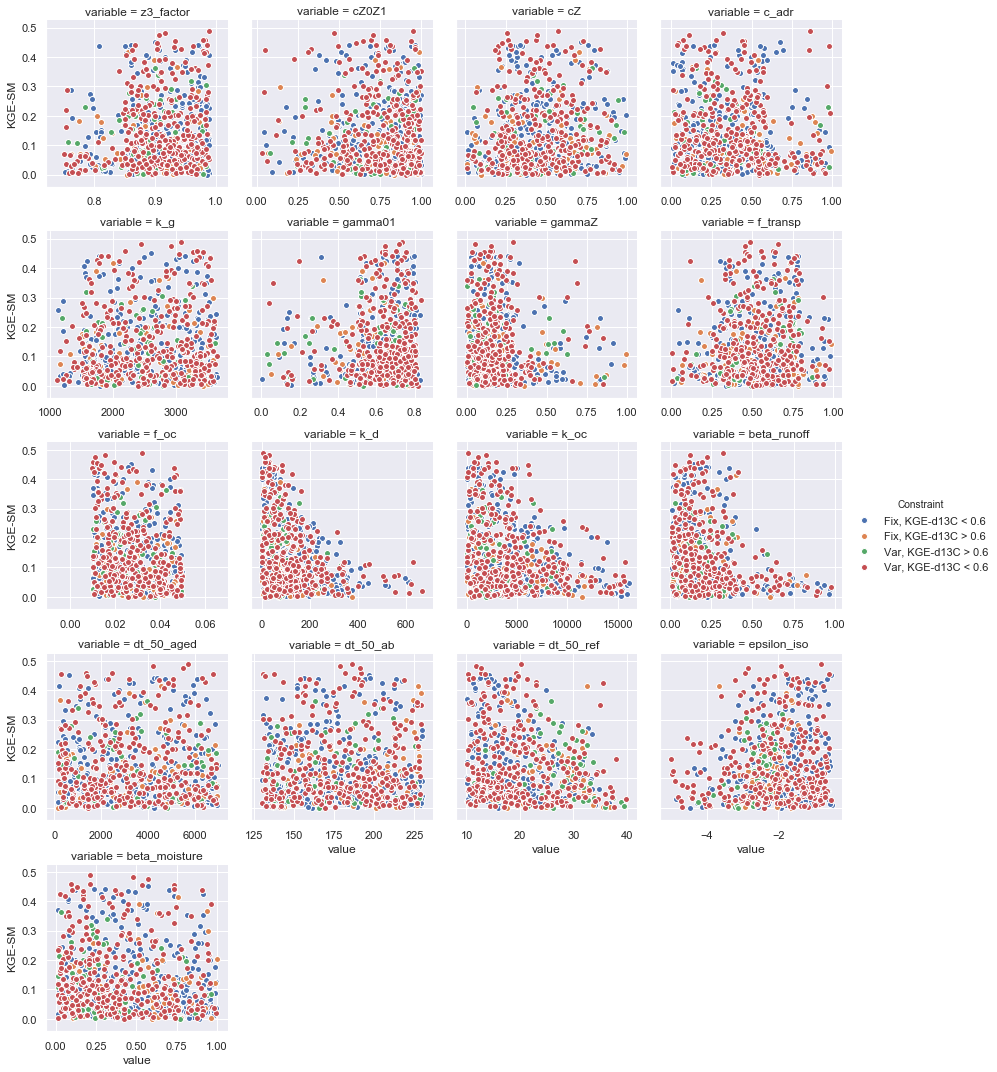

In [26]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Constraint", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-SM', edgecolor="w").add_legend()

In [27]:
dm_simp = pd.melt(ff, 
                 id_vars=['KGE-SM', 'KGE-d13C', 'Constraint', 'Model'],
             value_vars=['dt_50_ref', 
                         'epsilon_iso',
#                          'beta_runoff',
                         'k_d', 
                         'beta_moisture'])

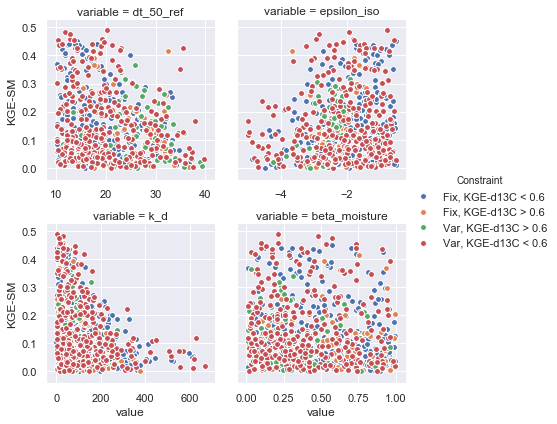

In [28]:
kws = dict(s=35, linewidth=1, edgecolor="w")
g = sns.FacetGrid(dm_simp, col="variable", hue="Constraint", col_wrap=2, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-SM', **kws).add_legend()
# g.savefig("VarVsFix_Fig2.pdf")

In [29]:
# ff = dfs.loc[(dfs['KGE-SM'] > 0.15)]

In [30]:
ff_pair = ff[['Constraint',
              'KGE-SM', 'KGE-CONC_out', 'KGE-CONC-tra',
              'k_d', 'k_oc', 'f_oc',
              'beta_runoff',
              'dt_50_aged', 'dt_50_ab',
              'dt_50_ref',
              'epsilon_iso',
              'beta_moisture']]

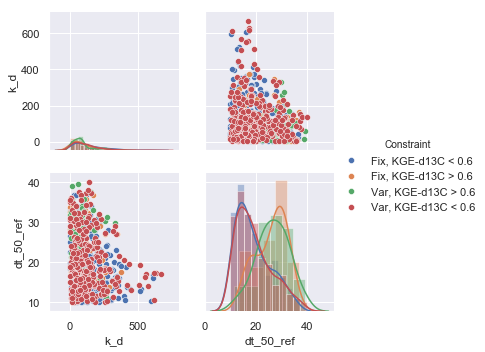

In [31]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[ "k_d", "dt_50_ref"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
# g.map_lower(plt.hist)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

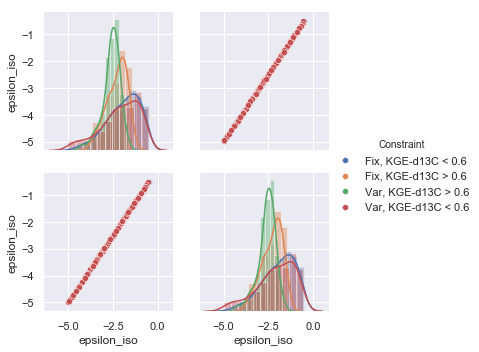

In [32]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[  "epsilon_iso", "epsilon_iso"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

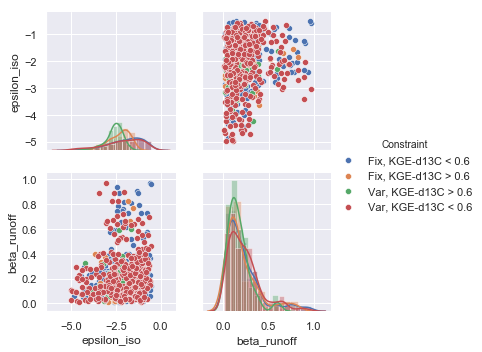

In [34]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[ "epsilon_iso", "beta_runoff"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

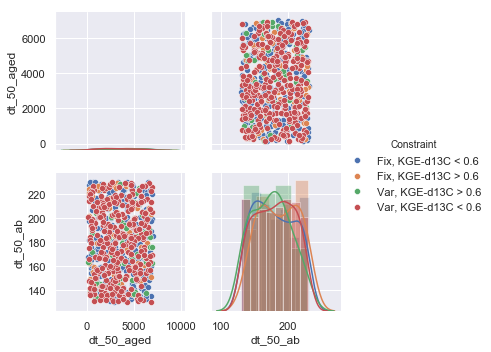

In [36]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[ "dt_50_aged", "dt_50_ab"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

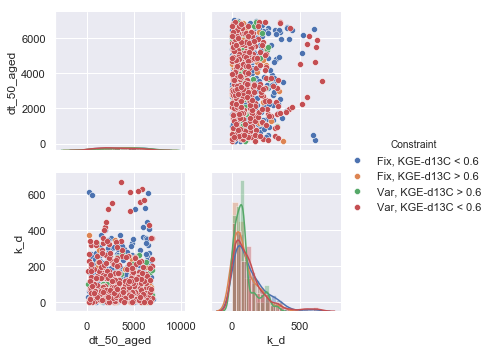

In [38]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[ "dt_50_aged", "k_d"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

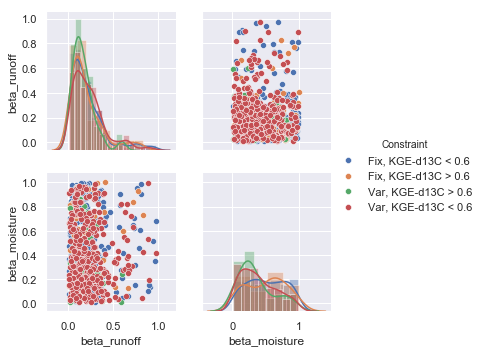

In [19]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[ "beta_runoff", "beta_moisture"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

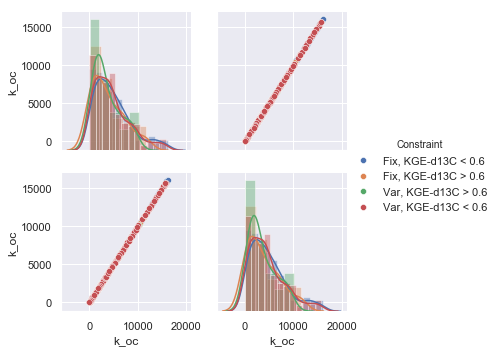

In [42]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[ "k_oc", "k_oc"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

In [41]:
# ff = dfs.loc[(dfs['KGE-CONC_out'] > 0)]

ff_pair = ff[['Constraint',
              'KGE-SM', 'KGE-CONC_out', 'KGE-CONC-tra',
              "BIAS-CONC-tra", "BIAS-CONC_out",
              'k_d', 'k_oc',  'f_oc',
              'beta_runoff',
              'dt_50_aged', 'dt_50_ab',
              'dt_50_ref',
              'epsilon_iso',
              'beta_moisture']]
# ff_pair = ff_pair.loc[(ff_pair['KGE-CONC_out'] > -3)] # 
len(ff_pair)

727

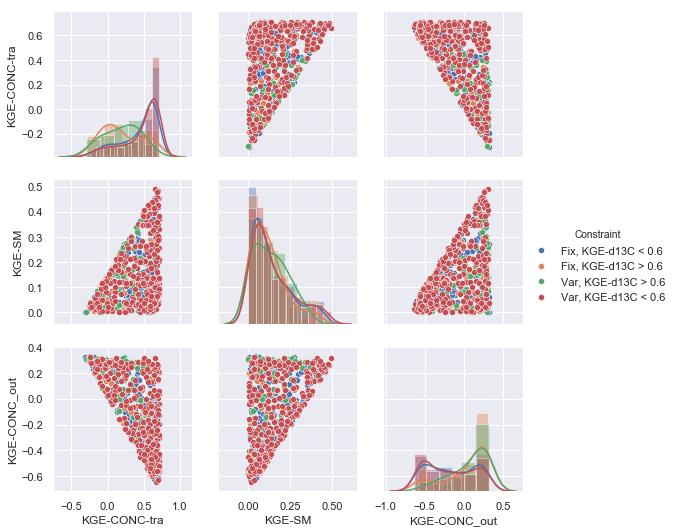

In [40]:

g = sns.PairGrid(ff_pair, hue='Constraint', vars=[  "KGE-CONC-tra", "KGE-SM", "KGE-CONC_out"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

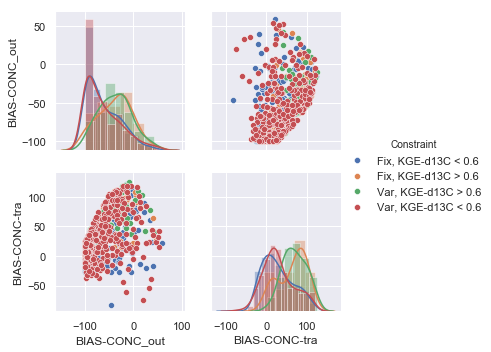

In [22]:
g = sns.PairGrid(ff_pair, hue='Constraint', vars=[  "BIAS-CONC_out", "BIAS-CONC-tra"] )
# g.map_diag(plt.hist, alpha=0.5)
# g.map_offdiag(plt.scatter, linewidth=1, edgecolor="w")

g.map_upper(plt.scatter, linewidth=0.5, edgecolor="w")
# g.map_lower(sns.kdeplot, n_levels=2)
g.map_lower(plt.scatter, linewidth=0.5, edgecolor="w")
g.map_diag(sns.distplot)

g.add_legend()

In [2]:
2000*.05

100.0